### Problem Statement - tweets classification
company X identifies ADRs (adverse drug reactions) after a drug’s release. Comprehensive knowledge of ADRs can reduce the detrimental impact on patient’s health system. Practically, clinical trials cannot investigate all settings in which a drug will be used, making it impossible to fully characterize the drug’s adverse effect profile before its approval. company X methods continuously analyse frequently updated data sources, Twitter in particularly because of its large user base, demographic variability, and publicly available data.
    ADR detection in social media requires automated methods to process the high data volume. It would greatly help her if she is able to automate the segmentation of Tweet into either ADR or NON-ADR, on the basis of Drug, Symptom and Effect mentioned in future.

In [81]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# sklearn 
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score,recall_score, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
# models
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
# vectorisation objects
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer

import nltk 
import string
import re
%matplotlib inline
from nltk.sentiment import SentimentIntensityAnalyzer

pd.set_option('display.max_colwidth', 100)
import warnings
warnings.filterwarnings('ignore')
stopword = nltk.corpus.stopwords.words('english')
# from sklearn.metrics import SCORERS 
# SCORERS.keys()

In [82]:
# word (irrelevant) + 
# stop words
#hyper parameters tunning


In [83]:
# uncomment below code to remove irrelevant words from the data
# stopword + ['therapy', 'associated','year','old','use','effect','following','man','woman','induced','CONCLUSION','RESULTS','METHODS','BACKGROUND','patient']

In [84]:
# Load dataset
def load_data():
    data = pd.read_csv('data_text.csv')
    return data
tweet_df = load_data()
print('Dataset size:',tweet_df.shape)
print('Columns are:',tweet_df.columns)

df = tweet_df.copy()

Dataset size: (23516, 3)
Columns are: Index(['ID', 'tweets', 'label'], dtype='object')


### pre-processing text data
1. Remove punctuations
2. Tokenization
3. Remove stopwords
4. Lammetization/stemming


In [85]:
# stopword
def clean_text(text):
#     1. # remove punctuations
    text_p = "".join([word for word in text if word not in string.punctuation]).lower()
#     2. # remove stopwords
    text_s = " ".join([word for word in text_p.split() if word not in stopword])
#     3. # remove numbers
    text_n = re.sub(pattern = "[0-9]+", repl='', string=text_s)
#     4. # lammetization
    text_l = " ".join([nltk.PorterStemmer().stem(word) for word in text_n.split()])
#     5. # tokenization
    tokens = re.split('\W+', text_l)
    return tokens   

In [86]:
df.head()

,ID,tweets,label
0,413205,Intravenous azithromycin-induced ototoxicity.,1
1,528244,"Immobilization, while Paget's bone disease was present, and perhaps enhanced activation of dihyd...",1
2,361834,Unaccountable severe hypercalcemia in a patient treated for hypoparathyroidism with dihydrotachy...,1
3,292240,METHODS: We report two cases of pseudoporphyria caused by naproxen and oxaprozin.,1
4,467101,METHODS: We report two cases of pseudoporphyria caused by naproxen and oxaprozin.,1


In [87]:
# df.tweets.apply(clean_text)

In [88]:
# ### vectorisation
# rank = ['This is blue sky','This is not blue sky','third']
# 6 distinct words

# ### vectorisation concept
# # sn this is blue sky not third
# # 1. 1 1 1 1 0 0
# # 2. 1 1 1 1 1 0
# # 3. 0 0 0 0 0 1

In [89]:
vectoriser = CountVectorizer()
X = vectoriser.fit_transform(df['tweets'])
print(X.toarray())
print(vectoriser.get_feature_names())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['00', '000', '00001', '0001', '00025', '001', '002', '004', '005', '008', '0096', '0099', '01', '015', '02', '025', '03', '030', '032', '035', '038', '04', '042', '04547', '0457', '05', '06', '07', '08', '09', '096', '098', '099', '10', '100', '1000', '100bpm', '100mg', '101', '10172', '102', '1021', '103', '1031', '104', '105', '1050', '106', '1078', '108', '109', '10mg', '10th', '11', '110', '1100', '111', '1115', '112', '113', '1132000', '114', '115', '1159', '116', '117', '118', '119', '1192', '11q21', '11q23', '12', '120', '1200', '122', '123', '123127', '124', '1240', '125', '1250', '125i', '126', '127', '1270', '128', '12h', '12p', '12th', '13', '130', '131', '131i', '132', '1327', '133', '134', '135', '136', '137', '1374', '138', '139', '1392', '13th', '14', '140', '1400', '141', '14225', '143', '144', '1440', '144600', '1450', '146', '148', '149', '15', '150

In [90]:
vectoriser = CountVectorizer(analyzer=clean_text)
X = vectoriser.fit_transform(df['tweets'])
print(X.toarray())
print(vectoriser.get_feature_names())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['a', 'aa', 'aaa', 'aav', 'ab', 'aba', 'abab', 'ababc', 'abacavir', 'abacavirlamivudin', 'abandon', 'abat', 'abdomen', 'abdomin', 'abdominocentesi', 'abdominopelv', 'abdominu', 'abemayor', 'aberr', 'abil', 'abl', 'ablat', 'ablc', 'ablmut', 'abmt', 'abnorm', 'abo', 'aboincompat', 'abolish', 'abomismatch', 'abort', 'abovement', 'abpa', 'abpct', 'abroad', 'abrog', 'abrupt', 'abruptli', 'abscess', 'abscessu', 'absenc', 'absent', 'absolut', 'absorb', 'absorpt', 'absorptiometri', 'abstain', 'abstin', 'abstract', 'abund', 'abus', 'abvd', 'ac', 'acad', 'academ', 'acanthameb', 'acanthameoba', 'acanthamoeba', 'acantholysi', 'acanthosi', 'acarbos', 'acc', 'acceler', 'accelerometri', 'accentu', 'accept', 'access', 'accessori', 'accid', 'accident', 'accol', 'accommod', 'accompani', 'accomplic', 'accomplish', 'accord', 'accordingli', 'account', 'accredit', 'accumul', 'accur', 'accu

In [91]:
# print(len(vectoriser.get_feature_names()))

In [92]:
# ### 
# ' This is severe case'
# ' This is not severe case'
# 'This is good'.'This is not good'
# ['this','is','not','good'] # n_grams = 1
# ['this is','is not','is good','not good']  # bi-grams
# 'United States of America'

In [93]:
### n_grams in nlp (read)

In [ ]:
# text = [['This is nlp class'] ['Nlp is natural language processing'] ]

# unique_words = ['this','is','nlp','class','natural','language','processing']

# Rowindex 'this','is','nlp','class','natural','language','processing'
# ['This is nlp class']                         1 1 1 1 0 0 0
# ['Nlp is natural language processing']        0 1 1 0 1 1 1

In [94]:
vectoriser = CountVectorizer(analyzer=clean_text, ngram_range=(2,2))
X = vectoriser.fit_transform(df['tweets'])
print(X.toarray())
# print(vectoriser.get_feature_names())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
# X.toarray()

In [95]:
### tf -idf => term frequency - inverse document frequency  (read)
vectoriser = TfidfVectorizer(analyzer=clean_text, ngram_range=(2,2))
X = vectoriser.fit_transform(df['tweets'])
print(X.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [96]:
df.shape[0] # no. of rows

23516

In [97]:
len(vectoriser.get_feature_names()) # no. of columns

14330

In [98]:
# pd.DataFrame(X.toarray()[:100]).to_csv('data.csv')

In [99]:
list(nltk.ngrams(['This','is','blue','sky','not'], n = 1))

[('This',), ('is',), ('blue',), ('sky',), ('not',)]

In [100]:
list(nltk.ngrams(['This','is','blue','sky','not'], n = 2))

[('This', 'is'), ('is', 'blue'), ('blue', 'sky'), ('sky', 'not')]

In [101]:
list(nltk.ngrams(['This','is','blue','sky','not'], n = 3))

[('This', 'is', 'blue'), ('is', 'blue', 'sky'), ('blue', 'sky', 'not')]

In [102]:
# ### Modeling
# logistic regression # 
# SVC # 
# Naive based classification 
# KNN # 
# RandomForestClassifier 

In [103]:
### which model works better on text data?

### Model Piplines

In [104]:
## spliting dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(df.tweets, df.label, test_size = 0.2, stratify = df.label, random_state = 42)

In [105]:
for est in [RandomForestClassifier(random_state=42), MultinomialNB(), GradientBoostingClassifier()]:
    rf_pip = Pipeline(steps=[('vectorisation',CountVectorizer(analyzer=clean_text)),
                            ('estimator',est)])
    scores = cross_val_score(rf_pip,X_train,y_train, cv = 3, scoring= 'roc_auc')
    print(scores)
    print(np.average(scores))
    print(np.std(scores))

[0.90429804 0.91093464 0.90490249]
0.9067117243856068
0.002996234061521033
[0.89502133 0.88590367 0.89795895]
0.8929613179034078
0.005132585854676006
[0.80313633 0.81227615 0.81827119]
0.8112278917742849
0.006223082332104632


In [106]:
# overfitting 
# Ex1: trainset - 0.9
# Ex2: trainset - 0.85  
# #     bagging -> bootstrap aggregation
# # boosting 
## Train Accuracy - Test Accuracy ~ delta (high) 
# what should be optimal value of delta which draws line for overfitting?

In [107]:
for est in [RandomForestClassifier(random_state=42), MultinomialNB(), GradientBoostingClassifier()]:
    rf_pip = Pipeline(steps=[('vectorisation',CountVectorizer(analyzer=clean_text)),
                             ('tfid', TfidfTransformer()),
                            ('estimator',est)])
    scores = cross_val_score(rf_pip,X_train,y_train, cv = 3, scoring= 'roc_auc')
    print(scores)
    print(np.average(scores))
    print(np.std(scores))

[0.90579584 0.91128052 0.91004406]
0.9090401404257159
0.0023489468307391114
[0.89234783 0.88287219 0.89083205]
0.8886840250971507
0.004155914722731575
[0.8058604  0.81616122 0.8192034 ]
0.8137416720457219
0.005709616416355661


In [108]:
# df.shape

In [109]:
# ## Base Mode
# rf= Pipeline(steps=[('vectorisation',CountVectorizer(analyzer=clean_text)),
#                          ('tfidfTransformation',TfidfTransformer()),
#                         ('estimator',RandomForestClassifier(random_state=42, n_jobs= -1))])
# rf_pip = rf.fit(X_train,y_train) ## training
# print(accuracy_score(y_train, rf_pip.predict(X_train))) ## auc score
# print(accuracy_score(y_test, rf_pip.predict(X_test))) ## auc score

0.9999468424409951
0.8756377551020408


In [110]:
## Base Mode
rf= Pipeline(steps=[('vectorisation',CountVectorizer(analyzer=clean_text)),
                         ('tfidfTransformation',TfidfTransformer()),
                        ('estimator',RandomForestClassifier(random_state=42, n_jobs= -1))])
rf_pip = rf.fit(X_train,y_train) ## training
print(accuracy_score(y_train, rf_pip.predict(X_train))) ## accuracy
print(accuracy_score(y_test, rf_pip.predict(X_test))) ## accuracy

0.9999468424409951
0.8756377551020408


## 1.  Hyper-parameters tunning usig gridsearchCV

Hyper parameters of RandomForestClassifier() 
 - estimators: no. of trees
 - max_features: no. of features to a model
 - max_depth: CART depth
 - min_samples_leaf: 

In [111]:
# for est in [1,50,100,500,1000,2000]:
#     {'1':0.2, '50':0.5,'100':0.8,'500':0.79,'1000':0.70,'2000':0.69}

In [112]:
# for est in [100,150,200,250,300,350,400,450,500]:
# #     {'1':0.2, '50':0.5,'100':0.8,'500':0.79,'1000':0.70,'2000':0.69}

In [113]:
# for est in [250,260,270,280,290,300]:
# #     {'1':0.2, '50':0.5,'100':0.8,'500':0.79,'1000':0.70,'2000':0.69}

In [34]:
# for est in [260,261,262,263,264,265,266,267,268,269,270]:
# #     {'1':0.2, '50':0.5,'100':0.8,'500':0.79,'1000':0.70,'2000':0.69}

In [35]:
## sample tunning code using GridSearchCV
params = {'estimator__n_estimators':range(1,2),
         'estimator__max_depth':range(1,2)}

gs_clf = GridSearchCV(estimator = rf, param_grid=params, cv = 3, scoring='roc_auc', n_jobs = -1)
gs_clf.fit(X_train,y_train)
print(roc_auc_score(y_test, gs_clf.predict(X_test))) ## auc score
print(accuracy_score(y_test, gs_clf.predict(X_test))) ## accuracy

0.5003663003663004
0.7100340136054422


In [36]:
# pd.DataFrame(gs_clf.cv_results_).sort_values(by = 'mean_test_score', ascending = False).to_csv('result.csv')

In [37]:
gs_clf.best_params_

{'estimator__max_depth': 1, 'estimator__n_estimators': 1}

In [ ]:
# CountVectorizer()

## 2. Tunning CountVectorizer() change ngram and record the scores 

In [39]:
## sample tunning code using GridSearchCV
params = {'vectorisation__ngram_range':[(1,1),(1,2),(2,2),(3,3)],
         'vectorisation__max_df':[0.1,0.2,0.5,1]}

gs_clf = GridSearchCV(estimator = rf, param_grid=params, cv = 3, scoring='roc_auc', n_jobs = -1)
gs_clf.fit(X_train,y_train)
print(roc_auc_score(y_test, gs_clf.predict(X_test))) ## auc score
print(accuracy_score(y_test, gs_clf.predict(X_test))) ## accuracy
pd.DataFrame(gs_clf.cv_results_).sort_values(by = 'mean_test_score', ascending = False).head(5)

In [ ]:
## Tunning parameters on both estimator and vectorizer 
params = {'estimator__n_estimators':range(1,2),
         'estimator__max_depth':range(1,2),
         'vectorisation__ngram_range':[(1,1),(1,2),(2,2),(3,3)],
         'vectorisation__max_df':[0.1,0.2,0.5,1]}

gs_clf = GridSearchCV(estimator = rf, param_grid=params, cv = 3, scoring='roc_auc', n_jobs = -1)
gs_clf.fit(X_train,y_train)
print(roc_auc_score(y_test, gs_clf.predict(X_test))) ## auc score
print(accuracy_score(y_test, gs_clf.predict(X_test))) ## accuracy
pd.DataFrame(gs_clf.cv_results_).sort_values(by = 'mean_test_score', ascending = False).head(5)

In [40]:
gs_clf.best_params_

{'estimator__max_depth': 1, 'estimator__n_estimators': 1}

## 3. Feature engineering

In [ ]:
# 1-> [10-20] (len)
# 0-> [30-40]

In [116]:
# Hypothesis 1: text(tweets) length of label class 1 > tweets length for label class 0
df['tweets_len'] = df.tweets.apply(lambda x : len(x))
df.loc[:,['tweets','tweets_len']].head()

,tweets,tweets_len
0,Intravenous azithromycin-induced ototoxicity.,45
1,"Immobilization, while Paget's bone disease was present, and perhaps enhanced activation of dihyd...",190
2,Unaccountable severe hypercalcemia in a patient treated for hypoparathyroidism with dihydrotachy...,103
3,METHODS: We report two cases of pseudoporphyria caused by naproxen and oxaprozin.,81
4,METHODS: We report two cases of pseudoporphyria caused by naproxen and oxaprozin.,81


In [117]:
tweets_len_1  = df[df.label == 1]['tweets_len']
tweets_len_0  = df[df.label == 0]['tweets_len']

In [125]:
print(max(tweets_len_1))
print(max(tweets_len_0))

568
742


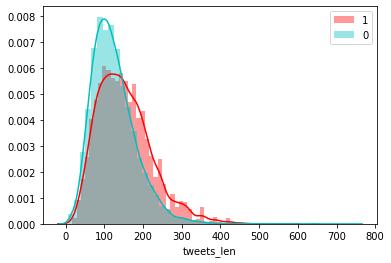

In [123]:
sns.distplot(tweets_len_1, color='r')
sns.distplot(tweets_len_0, color='c')
plt.legend(['1','0'])

In [128]:
# Hypothesis 2: text(tweets_Clean) length of label class 1 > tweets_clean length for label class 0
df['tweets_clean'] = df.tweets.apply(clean_text)
df['tweets_len_c'] = df.tweets_clean.apply(lambda x : len(x))
df.loc[:,['tweets','tweets_len','tweets_len_c']].head()

,tweets,tweets_len,tweets_len_c
0,Intravenous azithromycin-induced ototoxicity.,45,3
1,"Immobilization, while Paget's bone disease was present, and perhaps enhanced activation of dihyd...",190,15
2,Unaccountable severe hypercalcemia in a patient treated for hypoparathyroidism with dihydrotachy...,103,7
3,METHODS: We report two cases of pseudoporphyria caused by naproxen and oxaprozin.,81,8
4,METHODS: We report two cases of pseudoporphyria caused by naproxen and oxaprozin.,81,8


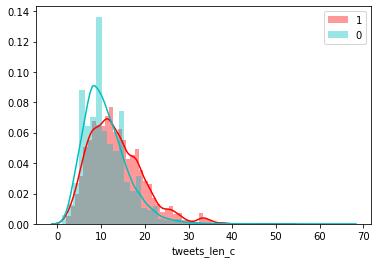

In [129]:
sns.distplot(df[df.label==1]['tweets_len_c'], color='r')
sns.distplot(df[df.label==0]['tweets_len_c'], color='c')
plt.legend(['1','0'])

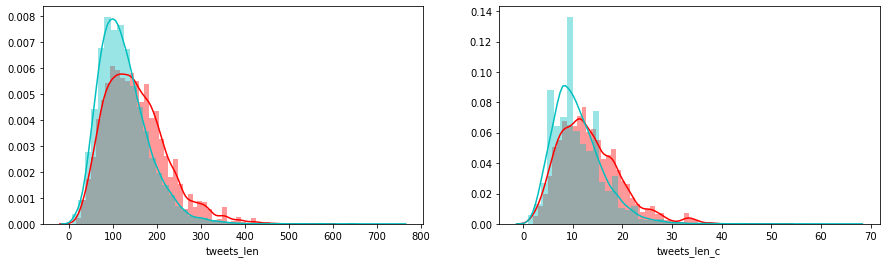

In [132]:
fig, ax = plt.subplots(1, 2, figsize= (15,4))

sns.distplot(tweets_len_1, color='r', ax = ax[0])
sns.distplot(tweets_len_0, color='c', ax = ax[0])

sns.distplot(df[df.label==1]['tweets_len_c'], color='r', ax = ax[1])
sns.distplot(df[df.label==0]['tweets_len_c'], color='c', ax = ax[1])

In [ ]:
## Hypothesis 3: class1 tweets will have higher negative sentiments than class0 tweets

In [133]:
from textblob import TextBlob

In [134]:
TextBlob('good').polarity ## sentiment score [-1,1] => +1 positive -1 negative 0 neutral

0.7

In [136]:
print(TextBlob('good').polarity)
print(TextBlob('better').polarity)
print(TextBlob('best').polarity)

0.7
0.5
1.0


In [140]:
print(TextBlob('This is good idea').polarity)
print(TextBlob('This is better idea').polarity)
print(TextBlob('This is the best idea').polarity)
print(TextBlob('This is the worst idea').polarity)
print(TextBlob('This is an idea').polarity)
print(TextBlob('This is an idea!').polarity)

0.7
0.5
1.0
-1.0
0.0
0.0


In [142]:
TextBlob('Intravenous azithromycin-induced ototoxicity').polarity

0.0

In [143]:
df['tweets_sentiments'] = df.tweets.apply(lambda x : TextBlob(x).polarity)
df.loc[:, ['tweets','tweets_sentiments']].head()

,tweets,tweets_sentiments
0,Intravenous azithromycin-induced ototoxicity.,0.0
1,"Immobilization, while Paget's bone disease was present, and perhaps enhanced activation of dihyd...",0.0
2,Unaccountable severe hypercalcemia in a patient treated for hypoparathyroidism with dihydrotachy...,0.0
3,METHODS: We report two cases of pseudoporphyria caused by naproxen and oxaprozin.,0.0
4,METHODS: We report two cases of pseudoporphyria caused by naproxen and oxaprozin.,0.0


In [144]:
df[df['tweets_sentiments'] == 0].shape[0]/len(df) # ~43% of the tweets have zero sentiments as per TextBlob

0.4262629698928389

In [151]:
df['tweets_sentiments_1'] = df.tweets.apply(lambda x : SentimentIntensityAnalyzer().polarity_scores(x)['compound'])
df.loc[:, ['tweets','tweets_sentiments','tweets_sentiments_1']].head()


,tweets,tweets_sentiments,tweets_sentiments_1
0,Intravenous azithromycin-induced ototoxicity.,0.0,0.0000
1,"Immobilization, while Paget's bone disease was present, and perhaps enhanced activation of dihyd...",0.0,0.2732
2,Unaccountable severe hypercalcemia in a patient treated for hypoparathyroidism with dihydrotachy...,0.0,-0.3818
3,METHODS: We report two cases of pseudoporphyria caused by naproxen and oxaprozin.,0.0,0.0000
4,METHODS: We report two cases of pseudoporphyria caused by naproxen and oxaprozin.,0.0,0.0000


In [153]:
SentimentIntensityAnalyzer().polarity_scores('This is bad')

{'neg': 0.636, 'neu': 0.364, 'pos': 0.0, 'compound': -0.5423}

Text(0.5, 1.0, 'Sentiment Scores Using SentimentIntensityAnalyzer')

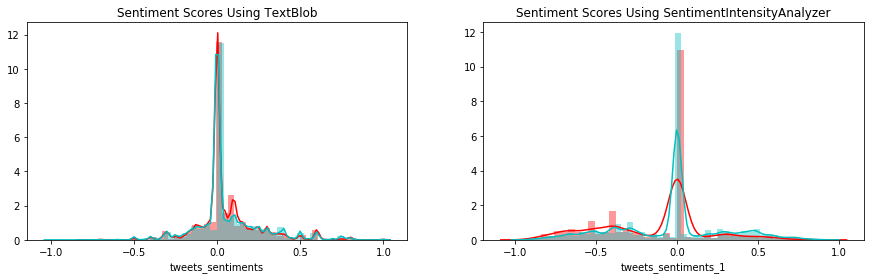

In [152]:
fig, ax = plt.subplots(1, 2, figsize= (15,4))

sns.distplot(df[df.label==1]['tweets_sentiments'], color='r', ax = ax[0])
sns.distplot(df[df.label==0]['tweets_sentiments'], color='c', ax = ax[0])
ax[0].set_title('Sentiment Scores Using TextBlob')

sns.distplot(df[df.label==1]['tweets_sentiments_1'], color='r', ax = ax[1])
sns.distplot(df[df.label==0]['tweets_sentiments_1'], color='c', ax = ax[1])
ax[1].set_title('Sentiment Scores Using SentimentIntensityAnalyzer')

In [162]:
label1 = df[df.label==1]
print(label1[label1['tweets_sentiments_1' ]>0].shape[0]/label1.shape[0])
print(label1[label1['tweets_sentiments_1' ]==0].shape[0]/label1.shape[0])
print(label1[label1['tweets_sentiments_1' ]<0].shape[0]/label1.shape[0])

0.14101436528877162
0.45338610378188215
0.40559953092934625


In [159]:
# df[df.ID==528244]['tweets'].tolist()

["Immobilization, while Paget's bone disease was present, and perhaps enhanced activation of dihydrotachysterol by rifampicin, could have led to increased calcium-release into the circulation."]

In [163]:
label1 = df[df.label==0]
print(label1[label1['tweets_sentiments_1' ]>0].shape[0]/label1.shape[0])
print(label1[label1['tweets_sentiments_1' ]==0].shape[0]/label1.shape[0])
print(label1[label1['tweets_sentiments_1' ]<0].shape[0]/label1.shape[0])

0.24266203426380736
0.4432730322271475
0.3140649335090452


In [168]:
label1[label1['tweets_sentiments_1' ]<0].head()

,ID,tweets,label,tweets_len,tweets_clean,tweets_len_c,tweets_sentiments,tweets_sentiments_1
6823,364250,BACKGROUND: External beam radiation therapy often is avoided in the treatment of rhabdomyosarcom...,0,156,"[background, extern, beam, radiat, therapi, often, avoid, treatment, rhabdomyosarcoma, rm, young...",14,0.05,-0.3400
6824,288704,"Although the enuresis ceased, she developed throbbing headaches, nausea, vomiting, paresthesia, ...",0,162,"[although, enuresi, ceas, develop, throb, headach, nausea, vomit, paresthesia, lethargi, fatigu,...",16,0.00,-0.5267
6826,47759,"A 16-year-old girl with erosive, polyarticular JRA showed no detectable change in her articular ...",0,129,"[yearold, girl, eros, polyarticular, jra, show, detect, chang, articular, diseas, follow, nine, ...",13,0.00,-0.2960
6827,167503,Resection and use of a cyclooxygenase-2 inhibitor for treatment of pancreatic adenocarcinoma in ...,0,108,"[resect, use, cyclooxygenas, inhibitor, treatment, pancreat, adenocarcinoma, cockatiel]",8,0.00,-0.0772
6828,580658,Differences in interpretation by patients and healthcare professionals may cause the observed di...,0,150,"[differ, interpret, patient, healthcar, profession, may, caus, observ, dispar, serious, outcom, ...",13,0.00,-0.0516


In [169]:
label1[label1.ID ==364250 ]['tweets'].tolist()

['BACKGROUND: External beam radiation therapy often is avoided in the treatment of rhabdomyosarcoma (RMS) in young children because of the long-term sequelae.']

In [173]:
# SentimentIntensityAnalyzer().polarity_scores(text = 'avoided')

In [ ]:
# ## sample code to pass derived features to the pipeline.
# from sklearn.pipeline import FunctionTransformer, FeatureUnion

def sentiment_score(x):
    return np.array([Textblob(t).polarity for t in x]).reshape(-1, 1)

def tweets_length(x):
    return np.array([len(t) for t in x]).reshape(-1, 1)

rf = Pipeline([
    ('features', FeatureUnion([
        ('text', Pipeline([
            ('vectorizer', CountVectorizer(clean_text)),
            ('tfidf', TfidfTransformer()),
        ])),
        ('length', Pipeline([
            ('count', FunctionTransformer(tweets_length, validate=False)),
        ])),
        ('sentiment', Pipeline([
            ('senti', FunctionTransformer(sentiment_score, validate=False)),
        ]))
    ])),
    ('clf', RandomForestClassifier())])

rf_pip = rf.fit(X_train,y_train) ## training
print(accuracy_score(y_train, rf_pip.predict(X_train))) 
print(accuracy_score(y_test, rf_pip.predict(X_test))) 

In [174]:
# pipeline (featureUnion (x, y))
# x -> pipeline(countvextorizer, tfidftransformer)
# y -> Pipeline(FunctionTransformer)

## 4. Feature selection

## 4(a). PCA

In [178]:
# len(vectoriser.get_feature_names())

14330

In [176]:
## Base Mode with diamention reduction 
from sklearn.decomposition import TruncatedSVD

rf= Pipeline(steps=[('vectorisation',CountVectorizer(analyzer=clean_text)),
                         ('tfidfTransformation',TfidfTransformer()),
                         ('pca',TruncatedSVD(n_components = 10)),
                        ('estimator',RandomForestClassifier(random_state=42, n_jobs= -1))])
rf_pip = rf.fit(X_train,y_train) ## training
## model performance evaluation
print(accuracy_score(y_train, rf_pip.predict(X_train))) ## accuracy

print(accuracy_score(y_test, rf_pip.predict(X_test))) ## accuracy

0.9535402934297257
0.8382227891156463


In [179]:
print(roc_auc_score(y_train, rf_pip.predict(X_train))) ## auc score
print(roc_auc_score(y_test, rf_pip.predict(X_test))) ## auc score

0.9207321637248761
0.7548114359435114
